### Importación de datos



In [1]:
# Importar la librería pandas
import pandas as pd

# URLs de los archivos de datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos en DataFrames
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Unir los 4 DataFrames en uno solo
df_completo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Convertir la columna 'Fecha de Compra' a formato de fecha para poder analizarla
df_completo['Fecha de Compra'] = pd.to_datetime(df_completo['Fecha de Compra'], format='%d/%m/%Y')

# Mostrar las primeras filas del DataFrame unificado para verificar
print("Datos unificados y listos para el análisis:")
df_completo.head()

Datos unificados y listos para el análisis:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



La facturación total de la tienda es: $4,638,316,200.00


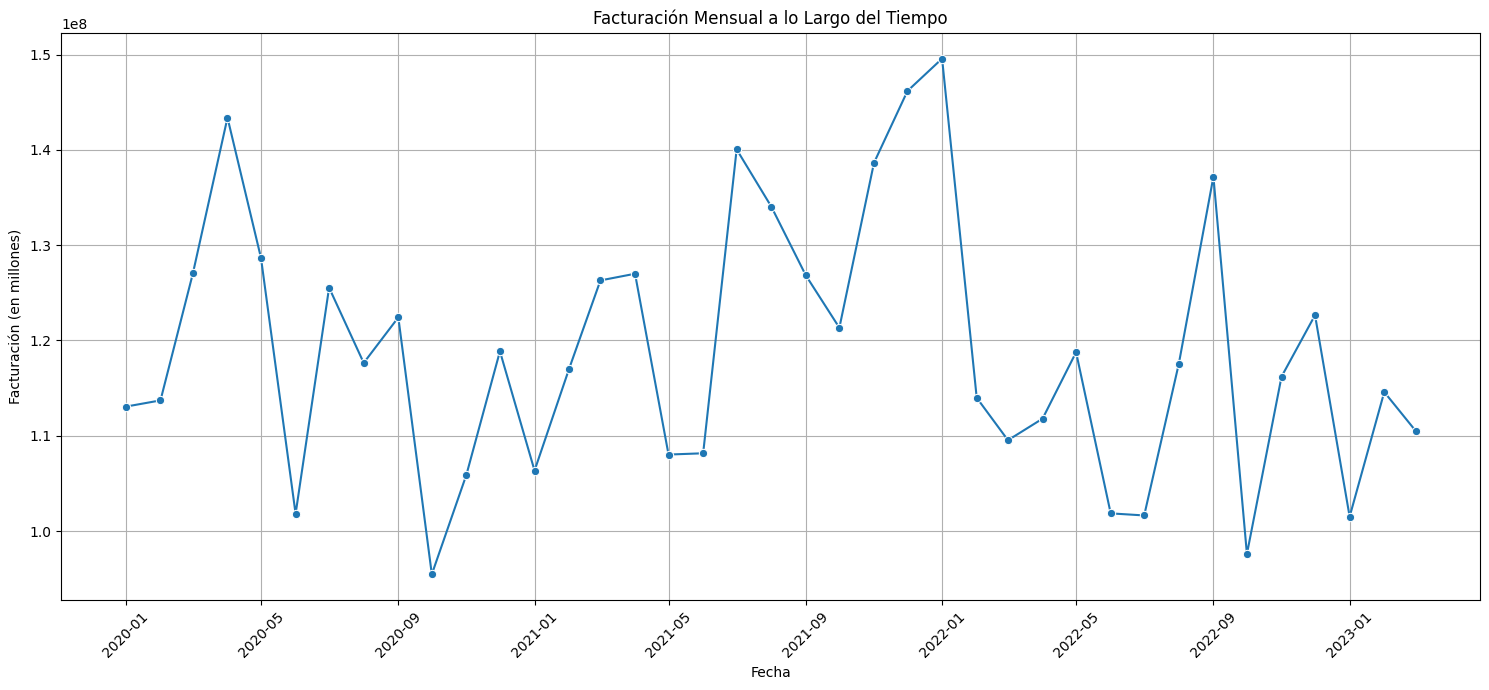

In [3]:
# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna 'Facturación'
df_completo['Facturación'] = df_completo['Precio'] + df_completo['Costo de envío']

# Calcular la facturación total
facturacion_total = df_completo['Facturación'].sum()
print(f"La facturación total de la tienda es: ${facturacion_total:,.2f}")

# --- Análisis de Facturación Mensual ---

# Extraer el mes y año de la fecha de compra para agrupar
df_completo['Mes_Año'] = df_completo['Fecha de Compra'].dt.to_period('M')

# Agrupar por mes y año y sumar la facturación
facturacion_mensual = df_completo.groupby('Mes_Año')['Facturación'].sum().reset_index()
facturacion_mensual['Mes_Año'] = facturacion_mensual['Mes_Año'].dt.to_timestamp() # Convertir a timestamp para graficar

# --- Visualización ---
plt.figure(figsize=(15, 7))
sns.lineplot(data=facturacion_mensual, x='Mes_Año', y='Facturación', marker='o')
plt.title('Facturación Mensual a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Facturación (en millones)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

--- Ventas Totales por Categoría ---
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturación, dtype: float64


/tmp/ipython-input-558319512.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.values, y=ventas_por_categoria.index, palette='viridis')


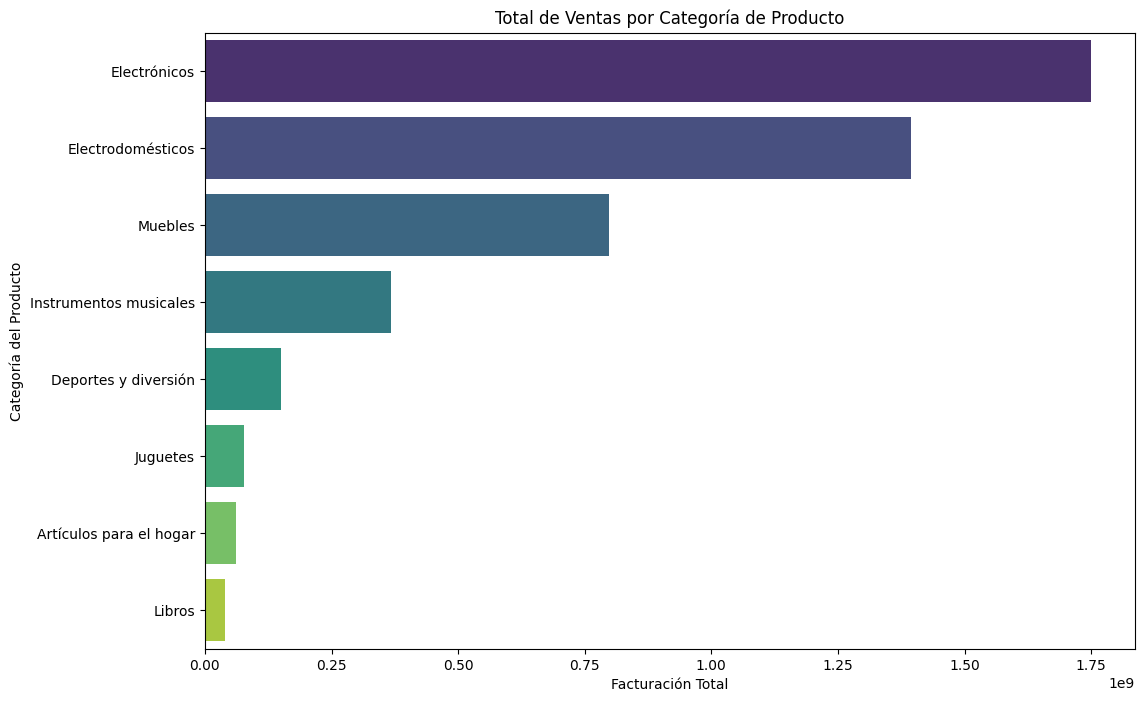

In [4]:
# Importar librerías si no lo has hecho
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por categoría y sumar la facturación
ventas_por_categoria = df_completo.groupby('Categoría del Producto')['Facturación'].sum().sort_values(ascending=False)

print("--- Ventas Totales por Categoría ---")
print(ventas_por_categoria)

# --- Visualización ---
plt.figure(figsize=(12, 8))
sns.barplot(x=ventas_por_categoria.values, y=ventas_por_categoria.index, palette='viridis')
plt.title('Total de Ventas por Categoría de Producto')
plt.xlabel('Facturación Total')
plt.ylabel('Categoría del Producto')
plt.show()

# 3. Calificación promedio de la tienda


In [5]:
# Calcular la calificación promedio general
calificacion_promedio_general = df_completo['Calificación'].mean()

print(f"La calificación promedio general de la tienda es: {calificacion_promedio_general:.2f}")

# Calcular la calificación promedio por lugar de compra
calificacion_por_lugar = df_completo.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)

print("\n--- Calificación Promedio por Lugar de Compra ---")
print(calificacion_por_lugar)

La calificación promedio general de la tienda es: 4.01

--- Calificación Promedio por Lugar de Compra ---
Lugar de Compra
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [6]:
# Contar la frecuencia de cada producto
conteo_productos = df_completo['Producto'].value_counts()

# Producto más vendido (el primero de la lista)
producto_mas_vendido = conteo_productos.index[0]
cantidad_mas_vendido = conteo_productos.iloc[0]

# Productos menos vendidos (todos los que tienen la cuenta mínima)
cantidad_menos_vendidos = conteo_productos.iloc[-1]
productos_menos_vendidos = conteo_productos[conteo_productos == cantidad_menos_vendidos].index.tolist()

print(f"Producto más vendido: '{producto_mas_vendido}' con {cantidad_mas_vendido} unidades.")
print(f"Productos menos vendidos (con {cantidad_menos_vendidos} unidad cada uno):")
for producto in productos_menos_vendidos:
    print(f"  - {producto}")

Producto más vendido: 'Mesa de noche' con 210 unidades.
Productos menos vendidos (con 157 unidad cada uno):
  - Celular ABXY


# 5. Envío promedio por tienda

In [7]:
# Agrupar por lugar de compra y calcular el costo de envío promedio
envio_promedio_por_tienda = df_completo.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values(ascending=False)

print("--- Costo de Envío Promedio por Lugar de Compra ---")
# Formatear la salida para que se vea como moneda
print(envio_promedio_por_tienda.apply(lambda x: f"${x:,.2f}"))

--- Costo de Envío Promedio por Lugar de Compra ---
Lugar de Compra
Soacha           $34,768.42
Inírida          $30,557.14
Cúcuta           $28,597.31
Pasto            $27,801.06
Neiva            $27,710.00
Bucaramanga      $26,790.06
Cali             $26,726.81
Leticia          $25,317.61
Medellín         $25,282.02
Villavicencio    $25,100.00
Manizales        $24,948.78
Bogotá           $24,532.08
Riohacha         $24,127.61
Pereira          $23,211.41
Armenia          $22,867.86
Barranquilla     $22,692.26
Cartagena        $22,638.43
Valledupar       $22,021.43
Santa Marta      $18,752.32
Name: Costo de envío, dtype: object
